# Градиентный бустинг и поиск по сетке (GridSearch)

## Данные
Будут использоваться тот же набор данных о грибах, что и в случае с AdaBoost.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Подготовка данных

In [9]:
X = df.drop('class', axis=1)

In [11]:
X = pd.get_dummies(X, drop_first=True, dtype='int')

In [13]:
y = df['class']

## Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Градиентный бустинг и поиск по сетке с кросс-валидацией

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |
 |  Gradient Boosting for classification.
 |
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression tre

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3, 4, 5]}

In [29]:
gb_model = GradientBoostingClassifier()

In [31]:
grid = GridSearchCV(gb_model, param_grid)

## Обучение модели

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [36]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

## Оценка работы модели

In [39]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [41]:
preds = grid.predict(X_test)

In [43]:
preds

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [45]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



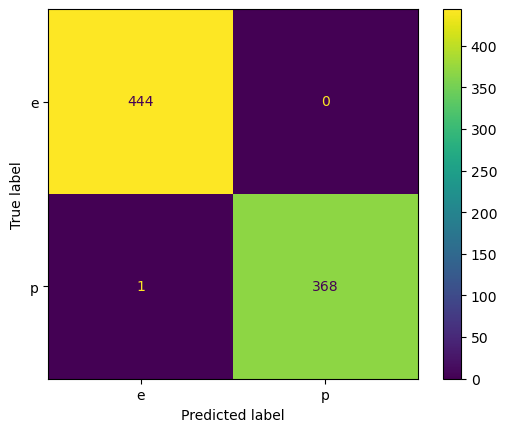

In [57]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

Посмотрим на важность признаков. Когда был выполнен поиск по сетке, чтобы посмотреть атрибуты получившейся модели, эту модель можно получить с помощью атрибута `best_estimator_` и уже далее вызывать атрибуты и методы для модели.

In [49]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 6.72652747e-16, 0.00000000e+00, 0.00000000e+00,
       1.23603671e-16, 1.68661908e-03, 4.67626798e-16, 2.13290686e-16,
       0.00000000e+00, 0.00000000e+00, 1.31327139e-16, 0.00000000e+00,
       1.40749578e-16, 0.00000000e+00, 0.00000000e+00, 4.12825228e-17,
       2.52290793e-03, 5.44236121e-02, 1.30525988e-04, 1.44810399e-02,
       2.07370954e-02, 8.25152765e-05, 6.15607813e-01, 6.24984488e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28843372e-02,
       1.09053648e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03013282e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.09350644e-04, 1.28931244e-01, 3.03211335e-03,
       2.22201157e-02, 1.73451352e-03, 0.00000000e+00, 0.00000000e+00,
       9.90406460e-06, 0.00000000e+00, 4.38155241e-02, 5.64616249e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [51]:
feat_import = grid.best_estimator_.feature_importances_

In [77]:
imp_feat = pd.DataFrame(data=feat_import, index=X.columns, columns=['Важность'])

In [79]:
imp_feat

,Важность
cap-shape_c,1.719903e-04
cap-shape_f,6.726527e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.236037e-16
...,...
habitat_l,0.000000e+00
habitat_m,2.912369e-18
habitat_p,0.000000e+00
habitat_u,4.126345e-18


In [81]:
imp_feat = imp_feat[imp_feat['Важность']>0.0005]

In [83]:
imp_feat = imp_feat.sort_values('Важность')

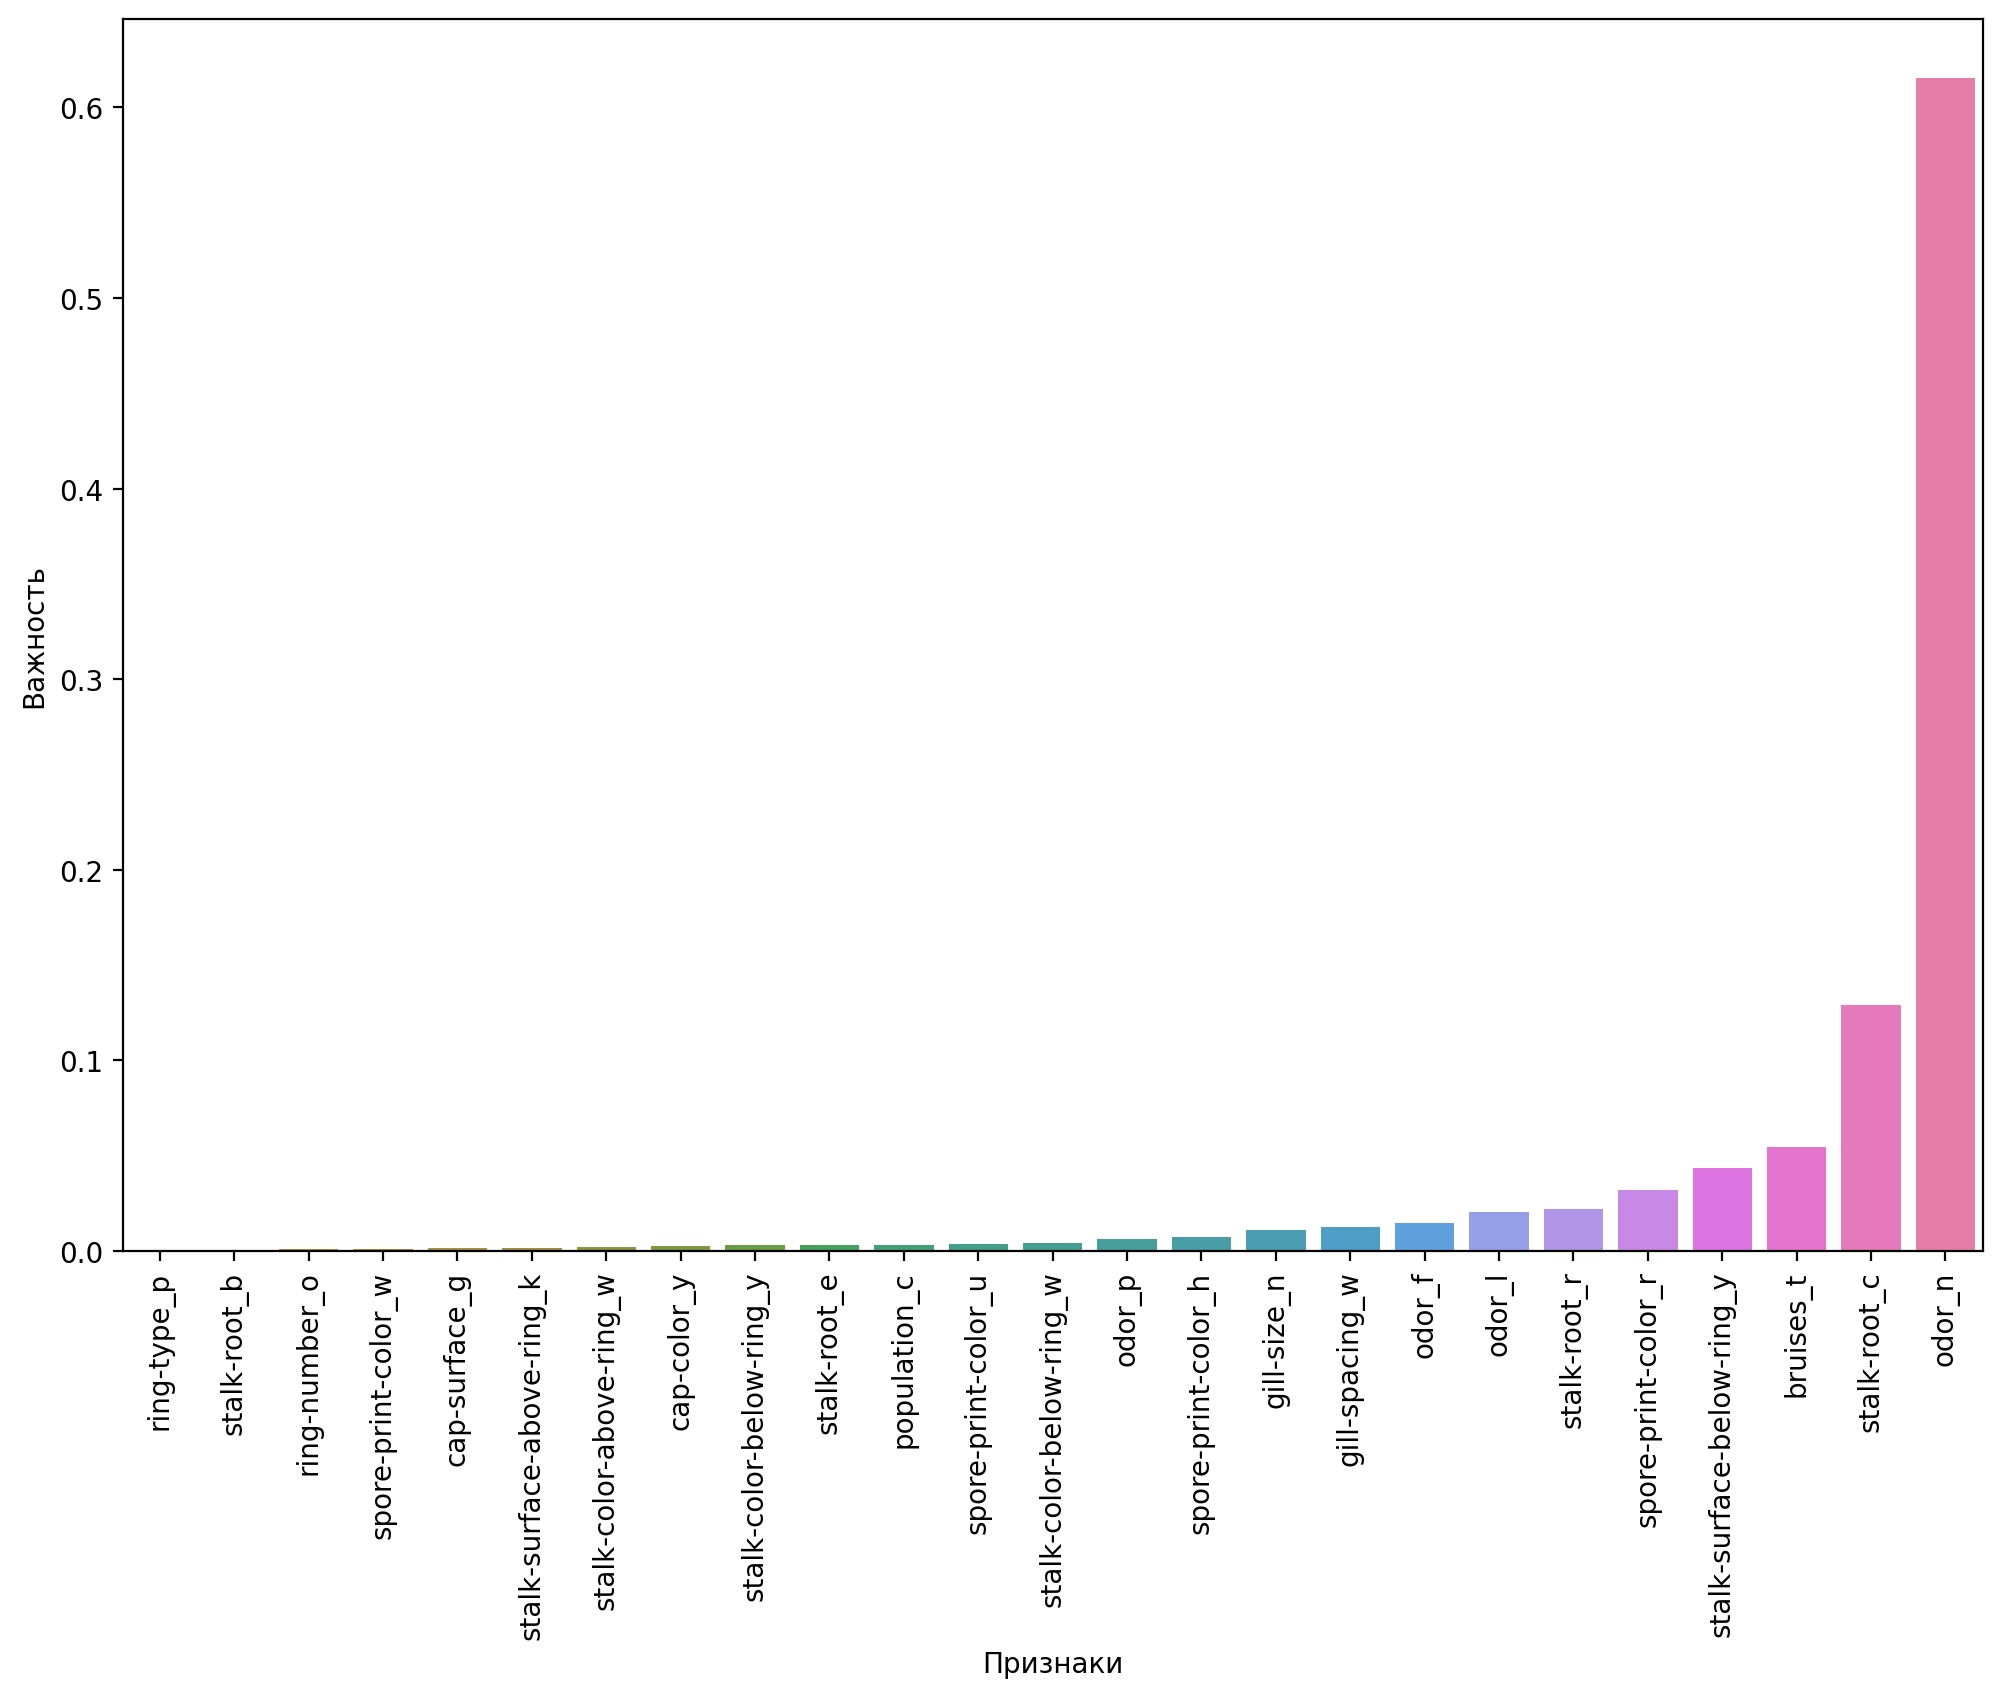

In [87]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Важность', hue=imp_feat.index)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.show()